In [ ]:
#https://www.kaggle.com/datasets/dansbecker/nba-shot-logs

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans, AgglomerativeClustering

In [69]:
shots = pd.read_csv (r'C:\Users\andre\Downloads\NBA Shots 2014-2105\2014-2015NBA_shot_log.csv')

In [70]:
shots.shape

(128069, 21)

In [71]:
shots

GAME_ID                   MATCHUP LOCATION  W  FINAL_MARGIN  \
0       21400899  MAR 04, 2015 - CHA @ BKN        A  W            24   
1       21400899  MAR 04, 2015 - CHA @ BKN        A  W            24   
2       21400899  MAR 04, 2015 - CHA @ BKN        A  W            24   
3       21400899  MAR 04, 2015 - CHA @ BKN        A  W            24   
4       21400899  MAR 04, 2015 - CHA @ BKN        A  W            24   
...          ...                       ...      ... ..           ...   
128064  21400006  OCT 29, 2014 - BKN @ BOS        A  L           -16   
128065  21400006  OCT 29, 2014 - BKN @ BOS        A  L           -16   
128066  21400006  OCT 29, 2014 - BKN @ BOS        A  L           -16   
128067  21400006  OCT 29, 2014 - BKN @ BOS        A  L           -16   
128068  21400006  OCT 29, 2014 - BKN @ BOS        A  L           -16   

        SHOT_NUMBER  PERIOD GAME_CLOCK  SHOT_CLOCK  DRIBBLES  ...  SHOT_DIST  \
0                 1       1       1:09        10.8         2  ...        7.7   
1                 2       1       0:14         3.4         0  ...       28.2   
2                 3       1       0:00         NaN         3  ...       10.1   
3                 4       2      11:47        10.3         2  ...       17.2   
4                 5       2      10:34        10.9         2  ...        3.7   
...             ...     ...        ...         ...       ...  ...        ...   
128064            5       3       1:52        18.3         5  ...        8.7   
128065            6       4      11:28        19.8         4  ...        0.6   
128066            7       4      11:10        23.0         2  ...       16.9   
128067            8       4       2:37         9.1         4  ...       18.3   
128068            9       4       0:12         NaN         5  ...        5.1   

        PTS_TYPE  SHOT_RESULT   CLOSEST_DEFENDER CLOSEST_DEFENDER_PLAYER_ID  \
0              2         made     Anderson, Alan                     101187   
1              3       missed  Bogdanovic, Bojan                     202711   
2              2       missed  Bogdanovic, Bojan                     202711   
3              2       missed      Brown, Markel                     203900   
4              2       missed    Young, Thaddeus                     201152   
...          ...          ...                ...                        ...   
128064         2       missed      Smart, Marcus                     203935   
128065         2         made       Turner, Evan                     202323   
128066         2         made   Thornton, Marcus                     201977   
128067         2       missed     Bradley, Avery                     202340   
128068         2         made     Bradley, Avery                     202340   

        CLOSE_DEF_DIST  FGM  PTS    player_name player_id  
0                  1.3    1    2  brian roberts    203148  
1                  6.1    0    0  brian roberts    203148  
2                  0.9    0    0  brian roberts    203148  
3                  3.4    0    0  brian roberts    203148  
4                  1.1    0    0  brian roberts    203148  
...                ...  ...  ...            ...       ...  
128064             0.8    0    0   jarrett jack    101127  
128065             0.6    1    2   jarrett jack    101127  
128066             4.2    1    2   jarrett jack    101127  
128067             3.0    0    0   jarrett jack    101127  
128068             2.3    1    2   jarrett jack    101127  

[128069 rows x 21 columns]

In [72]:
shots.columns

Index(['GAME_ID', 'MATCHUP', 'LOCATION', 'W', 'FINAL_MARGIN', 'SHOT_NUMBER',
       'PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'SHOT_RESULT', 'CLOSEST_DEFENDER',
       'CLOSEST_DEFENDER_PLAYER_ID', 'CLOSE_DEF_DIST', 'FGM', 'PTS',
       'player_name', 'player_id'],
      dtype='object')

In [73]:
#Filter columns to keep
shots = shots.drop(['W', 'FINAL_MARGIN', 'CLOSEST_DEFENDER_PLAYER_ID', 'FGM',
                    'player_id'], axis=1)

In [74]:
shots.columns

Index(['GAME_ID', 'MATCHUP', 'LOCATION', 'SHOT_NUMBER', 'PERIOD', 'GAME_CLOCK',
       'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'PTS_TYPE',
       'SHOT_RESULT', 'CLOSEST_DEFENDER', 'CLOSE_DEF_DIST', 'PTS',
       'player_name'],
      dtype='object')

In [75]:
shots.isna().sum()

GAME_ID                0
MATCHUP                0
LOCATION               0
SHOT_NUMBER            0
PERIOD                 0
GAME_CLOCK             0
SHOT_CLOCK          5567
DRIBBLES               0
TOUCH_TIME             0
SHOT_DIST              0
PTS_TYPE               0
SHOT_RESULT            0
CLOSEST_DEFENDER       0
CLOSE_DEF_DIST         0
PTS                    0
player_name            0
dtype: int64

In [76]:
shots.dtypes

GAME_ID               int64
MATCHUP              object
LOCATION             object
SHOT_NUMBER           int64
PERIOD                int64
GAME_CLOCK           object
SHOT_CLOCK          float64
DRIBBLES              int64
TOUCH_TIME          float64
SHOT_DIST           float64
PTS_TYPE              int64
SHOT_RESULT          object
CLOSEST_DEFENDER     object
CLOSE_DEF_DIST      float64
PTS                   int64
player_name          object
dtype: object

In [77]:
#Convert game clock to seconds
shots[['minutes', 'seconds']] = shots["GAME_CLOCK"].str.split(pat=":", expand=True)

In [78]:
shots['minutes'] = shots['minutes'].astype(int)
shots['seconds'] = shots['seconds'].astype(int)

In [79]:
shots['REM_SEC'] = (shots['minutes'] * 60) + shots['seconds']

In [80]:
shots

GAME_ID                   MATCHUP LOCATION  SHOT_NUMBER  PERIOD  \
0       21400899  MAR 04, 2015 - CHA @ BKN        A            1       1   
1       21400899  MAR 04, 2015 - CHA @ BKN        A            2       1   
2       21400899  MAR 04, 2015 - CHA @ BKN        A            3       1   
3       21400899  MAR 04, 2015 - CHA @ BKN        A            4       2   
4       21400899  MAR 04, 2015 - CHA @ BKN        A            5       2   
...          ...                       ...      ...          ...     ...   
128064  21400006  OCT 29, 2014 - BKN @ BOS        A            5       3   
128065  21400006  OCT 29, 2014 - BKN @ BOS        A            6       4   
128066  21400006  OCT 29, 2014 - BKN @ BOS        A            7       4   
128067  21400006  OCT 29, 2014 - BKN @ BOS        A            8       4   
128068  21400006  OCT 29, 2014 - BKN @ BOS        A            9       4   

       GAME_CLOCK  SHOT_CLOCK  DRIBBLES  TOUCH_TIME  SHOT_DIST  PTS_TYPE  \
0            1:09        10.8         2         1.9        7.7         2   
1            0:14         3.4         0         0.8       28.2         3   
2            0:00         NaN         3         2.7       10.1         2   
3           11:47        10.3         2         1.9       17.2         2   
4           10:34        10.9         2         2.7        3.7         2   
...           ...         ...       ...         ...        ...       ...   
128064       1:52        18.3         5         6.2        8.7         2   
128065      11:28        19.8         4         5.2        0.6         2   
128066      11:10        23.0         2         4.2       16.9         2   
128067       2:37         9.1         4         4.5       18.3         2   
128068       0:12         NaN         5         4.7        5.1         2   

       SHOT_RESULT   CLOSEST_DEFENDER  CLOSE_DEF_DIST  PTS    player_name  \
0             made     Anderson, Alan             1.3    2  brian roberts   
1           missed  Bogdanovic, Bojan             6.1    0  brian roberts   
2           missed  Bogdanovic, Bojan             0.9    0  brian roberts   
3           missed      Brown, Markel             3.4    0  brian roberts   
4           missed    Young, Thaddeus             1.1    0  brian roberts   
...            ...                ...             ...  ...            ...   
128064      missed      Smart, Marcus             0.8    0   jarrett jack   
128065        made       Turner, Evan             0.6    2   jarrett jack   
128066        made   Thornton, Marcus             4.2    2   jarrett jack   
128067      missed     Bradley, Avery             3.0    0   jarrett jack   
128068        made     Bradley, Avery             2.3    2   jarrett jack   

        minutes  seconds  REM_SEC  
0             1        9       69  
1             0       14       14  
2             0        0        0  
3            11       47      707  
4            10       34      634  
...         ...      ...      ...  
128064        1       52      112  
128065       11       28      688  
128066       11       10      670  
128067        2       37      157  
128068        0       12       12  

[128069 rows x 19 columns]

In [81]:
shots = shots.drop(['GAME_CLOCK', 'minutes', 'seconds'], axis=1)
shots.columns

Index(['GAME_ID', 'MATCHUP', 'LOCATION', 'SHOT_NUMBER', 'PERIOD', 'SHOT_CLOCK',
       'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'PTS_TYPE', 'SHOT_RESULT',
       'CLOSEST_DEFENDER', 'CLOSE_DEF_DIST', 'PTS', 'player_name', 'REM_SEC'],
      dtype='object')

In [82]:
#Column order
shots = shots[['MATCHUP', 'GAME_ID', 'player_name', 'LOCATION', 'SHOT_NUMBER', 'PERIOD', 'REM_SEC', 'SHOT_CLOCK', 'DRIBBLES',
       'TOUCH_TIME', 'SHOT_DIST', 'PTS_TYPE', 'SHOT_RESULT', 'PTS',
       'CLOSEST_DEFENDER', 'CLOSE_DEF_DIST']]

In [83]:
shots

MATCHUP   GAME_ID    player_name LOCATION  \
0       MAR 04, 2015 - CHA @ BKN  21400899  brian roberts        A   
1       MAR 04, 2015 - CHA @ BKN  21400899  brian roberts        A   
2       MAR 04, 2015 - CHA @ BKN  21400899  brian roberts        A   
3       MAR 04, 2015 - CHA @ BKN  21400899  brian roberts        A   
4       MAR 04, 2015 - CHA @ BKN  21400899  brian roberts        A   
...                          ...       ...            ...      ...   
128064  OCT 29, 2014 - BKN @ BOS  21400006   jarrett jack        A   
128065  OCT 29, 2014 - BKN @ BOS  21400006   jarrett jack        A   
128066  OCT 29, 2014 - BKN @ BOS  21400006   jarrett jack        A   
128067  OCT 29, 2014 - BKN @ BOS  21400006   jarrett jack        A   
128068  OCT 29, 2014 - BKN @ BOS  21400006   jarrett jack        A   

        SHOT_NUMBER  PERIOD  REM_SEC  SHOT_CLOCK  DRIBBLES  TOUCH_TIME  \
0                 1       1       69        10.8         2         1.9   
1                 2       1       14         3.4         0         0.8   
2                 3       1        0         NaN         3         2.7   
3                 4       2      707        10.3         2         1.9   
4                 5       2      634        10.9         2         2.7   
...             ...     ...      ...         ...       ...         ...   
128064            5       3      112        18.3         5         6.2   
128065            6       4      688        19.8         4         5.2   
128066            7       4      670        23.0         2         4.2   
128067            8       4      157         9.1         4         4.5   
128068            9       4       12         NaN         5         4.7   

        SHOT_DIST  PTS_TYPE SHOT_RESULT  PTS   CLOSEST_DEFENDER  \
0             7.7         2        made    2     Anderson, Alan   
1            28.2         3      missed    0  Bogdanovic, Bojan   
2            10.1         2      missed    0  Bogdanovic, Bojan   
3            17.2         2      missed    0      Brown, Markel   
4             3.7         2      missed    0    Young, Thaddeus   
...           ...       ...         ...  ...                ...   
128064        8.7         2      missed    0      Smart, Marcus   
128065        0.6         2        made    2       Turner, Evan   
128066       16.9         2        made    2   Thornton, Marcus   
128067       18.3         2      missed    0     Bradley, Avery   
128068        5.1         2        made    2     Bradley, Avery   

        CLOSE_DEF_DIST  
0                  1.3  
1                  6.1  
2                  0.9  
3                  3.4  
4                  1.1  
...                ...  
128064             0.8  
128065             0.6  
128066             4.2  
128067             3.0  
128068             2.3  

[128069 rows x 16 columns]

In [289]:
#Examine the null values for shot clock
count = 0
for index, row in shots.iterrows():
    if type(row['SHOT_CLOCK']) == float and pd.isna(row['SHOT_CLOCK']):
        if row['REM_SEC'] <= 24:
            count = count + 1

print(count)

3554


In [84]:
#Fill na with remaining sec
shots['SHOT_CLOCK'] = shots['SHOT_CLOCK'].fillna(shots['REM_SEC'])

In [85]:
#remove rows with shot clock over 24
shots = shots[shots['SHOT_CLOCK'] <= 24]

In [86]:
shots.shape

(126056, 16)

In [208]:
#Should be 2013, 3554 rows were kept
128069 - 126056

2013

In [87]:
#Change home and away to 0 and 1
shots['LOCATION'] = shots['LOCATION'].replace(['H'], 0)
shots['LOCATION'] = shots['LOCATION'].replace(['A'], 1)

shots['LOCATION'].value_counts()

C:\Users\andre\AppData\Local\Temp/ipykernel_1604/3894877609.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots['LOCATION'] = shots['LOCATION'].replace(['H'], 0)
C:\Users\andre\AppData\Local\Temp/ipykernel_1604/3894877609.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots['LOCATION'] = shots['LOCATION'].replace(['A'], 1)


1    63149
0    62907
Name: LOCATION, dtype: int64

In [88]:
#Change shot result to 0 and 1
shots['SHOT_RESULT'] = shots['SHOT_RESULT'].replace(['made'], 1)
shots['SHOT_RESULT'] = shots['SHOT_RESULT'].replace(['missed'], 0)

shots['SHOT_RESULT'].value_counts()

C:\Users\andre\AppData\Local\Temp/ipykernel_1604/3579571351.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots['SHOT_RESULT'] = shots['SHOT_RESULT'].replace(['made'], 1)
C:\Users\andre\AppData\Local\Temp/ipykernel_1604/3579571351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots['SHOT_RESULT'] = shots['SHOT_RESULT'].replace(['missed'], 0)


0    69042
1    57014
Name: SHOT_RESULT, dtype: int64

In [89]:
shots

MATCHUP   GAME_ID    player_name  LOCATION  \
0       MAR 04, 2015 - CHA @ BKN  21400899  brian roberts         1   
1       MAR 04, 2015 - CHA @ BKN  21400899  brian roberts         1   
2       MAR 04, 2015 - CHA @ BKN  21400899  brian roberts         1   
3       MAR 04, 2015 - CHA @ BKN  21400899  brian roberts         1   
4       MAR 04, 2015 - CHA @ BKN  21400899  brian roberts         1   
...                          ...       ...            ...       ...   
128064  OCT 29, 2014 - BKN @ BOS  21400006   jarrett jack         1   
128065  OCT 29, 2014 - BKN @ BOS  21400006   jarrett jack         1   
128066  OCT 29, 2014 - BKN @ BOS  21400006   jarrett jack         1   
128067  OCT 29, 2014 - BKN @ BOS  21400006   jarrett jack         1   
128068  OCT 29, 2014 - BKN @ BOS  21400006   jarrett jack         1   

        SHOT_NUMBER  PERIOD  REM_SEC  SHOT_CLOCK  DRIBBLES  TOUCH_TIME  \
0                 1       1       69        10.8         2         1.9   
1                 2       1       14         3.4         0         0.8   
2                 3       1        0         0.0         3         2.7   
3                 4       2      707        10.3         2         1.9   
4                 5       2      634        10.9         2         2.7   
...             ...     ...      ...         ...       ...         ...   
128064            5       3      112        18.3         5         6.2   
128065            6       4      688        19.8         4         5.2   
128066            7       4      670        23.0         2         4.2   
128067            8       4      157         9.1         4         4.5   
128068            9       4       12        12.0         5         4.7   

        SHOT_DIST  PTS_TYPE  SHOT_RESULT  PTS   CLOSEST_DEFENDER  \
0             7.7         2            1    2     Anderson, Alan   
1            28.2         3            0    0  Bogdanovic, Bojan   
2            10.1         2            0    0  Bogdanovic, Bojan   
3            17.2         2            0    0      Brown, Markel   
4             3.7         2            0    0    Young, Thaddeus   
...           ...       ...          ...  ...                ...   
128064        8.7         2            0    0      Smart, Marcus   
128065        0.6         2            1    2       Turner, Evan   
128066       16.9         2            1    2   Thornton, Marcus   
128067       18.3         2            0    0     Bradley, Avery   
128068        5.1         2            1    2     Bradley, Avery   

        CLOSE_DEF_DIST  
0                  1.3  
1                  6.1  
2                  0.9  
3                  3.4  
4                  1.1  
...                ...  
128064             0.8  
128065             0.6  
128066             4.2  
128067             3.0  
128068             2.3  

[126056 rows x 16 columns]

In [90]:
shots['TOUCH_TIME'].value_counts()

 0.8    12311
 0.9     8598
 1.0     8012
 0.7     6503
 1.1     4056
        ...  
-7.8        1
-3.8        1
-3.5        1
-7.3        1
-8.8        1
Name: TOUCH_TIME, Length: 311, dtype: int64

In [91]:
#Remove touch time rows that are negative
shots = shots[shots['TOUCH_TIME'] >= 0]

In [92]:
#Make a column for cumulative points in a game%
shots['total_pts'] = shots.groupby(['player_name', 'GAME_ID'])['PTS'].cumsum()


C:\Users\andre\AppData\Local\Temp/ipykernel_1604/2522318376.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots['total_pts'] = shots.groupby(['player_name', 'GAME_ID'])['PTS'].cumsum()


In [93]:
#Make a column for month
#The sample is only from OCT to MAR

months = {
    'JAN':'1',
    'FEB': '2',
    'MAR': '3',
    'OCT':'10',
    'NOV':'11',
    'DEC':'12'
         }
def clean_month(x):
    temp = x[0:3]
    y = re.sub(temp+'.*', months[temp], x)
    return y


In [94]:
shots['months'] = shots.MATCHUP.apply(clean_month)

C:\Users\andre\AppData\Local\Temp/ipykernel_1604/695295808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots['months'] = shots.MATCHUP.apply(clean_month)


In [98]:
shots['months'].value_counts()

12    34129
1     32243
11    30074
2     21439
3      4345
10     3521
Name: months, dtype: int64

In [100]:
shots.columns

Index(['MATCHUP', 'GAME_ID', 'player_name', 'LOCATION', 'SHOT_NUMBER',
       'PERIOD', 'REM_SEC', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'SHOT_RESULT', 'PTS', 'CLOSEST_DEFENDER',
       'CLOSE_DEF_DIST', 'total_pts', 'months'],
      dtype='object')

In [101]:
#Change column order, drop matchup
shots = shots[['player_name', 'LOCATION', 'months', 'SHOT_NUMBER', 'PERIOD', 'REM_SEC',
       'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'PTS_TYPE',
       'SHOT_RESULT', 'total_pts', 'CLOSEST_DEFENDER', 'CLOSE_DEF_DIST']]

In [105]:
#Make months an integer
shots['months'] = shots['months'].astype(int)

C:\Users\andre\AppData\Local\Temp/ipykernel_1604/80930308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots['months'] = shots['months'].astype(int)


In [107]:
shots

player_name  LOCATION  months  SHOT_NUMBER  PERIOD  REM_SEC  \
0       brian roberts         1       3            1       1       69   
1       brian roberts         1       3            2       1       14   
2       brian roberts         1       3            3       1        0   
3       brian roberts         1       3            4       2      707   
4       brian roberts         1       3            5       2      634   
...               ...       ...     ...          ...     ...      ...   
128064   jarrett jack         1      10            5       3      112   
128065   jarrett jack         1      10            6       4      688   
128066   jarrett jack         1      10            7       4      670   
128067   jarrett jack         1      10            8       4      157   
128068   jarrett jack         1      10            9       4       12   

        SHOT_CLOCK  DRIBBLES  TOUCH_TIME  SHOT_DIST  PTS_TYPE  SHOT_RESULT  \
0             10.8         2         1.9        7.7         2            1   
1              3.4         0         0.8       28.2         3            0   
2              0.0         3         2.7       10.1         2            0   
3             10.3         2         1.9       17.2         2            0   
4             10.9         2         2.7        3.7         2            0   
...            ...       ...         ...        ...       ...          ...   
128064        18.3         5         6.2        8.7         2            0   
128065        19.8         4         5.2        0.6         2            1   
128066        23.0         2         4.2       16.9         2            1   
128067         9.1         4         4.5       18.3         2            0   
128068        12.0         5         4.7        5.1         2            1   

        total_pts   CLOSEST_DEFENDER  CLOSE_DEF_DIST  
0               2     Anderson, Alan             1.3  
1               2  Bogdanovic, Bojan             6.1  
2               2  Bogdanovic, Bojan             0.9  
3               2      Brown, Markel             3.4  
4               2    Young, Thaddeus             1.1  
...           ...                ...             ...  
128064          4      Smart, Marcus             0.8  
128065          6       Turner, Evan             0.6  
128066          8   Thornton, Marcus             4.2  
128067          8     Bradley, Avery             3.0  
128068         10     Bradley, Avery             2.3  

[125751 rows x 15 columns]

In [109]:
#Save data as csv
shots.to_csv(r'C:\Users\andre\Downloads\NBA Shots 2014-2105\shots2.csv', index = False)

In [2]:
#Re-import data
shots = pd.read_csv (r'C:\Users\andre\Downloads\NBA Shots 2014-2105\shots2.csv')

In [3]:
shots

player_name  LOCATION  months  SHOT_NUMBER  PERIOD  REM_SEC  \
0       brian roberts         1       3            1       1       69   
1       brian roberts         1       3            2       1       14   
2       brian roberts         1       3            3       1        0   
3       brian roberts         1       3            4       2      707   
4       brian roberts         1       3            5       2      634   
...               ...       ...     ...          ...     ...      ...   
125746   jarrett jack         1      10            5       3      112   
125747   jarrett jack         1      10            6       4      688   
125748   jarrett jack         1      10            7       4      670   
125749   jarrett jack         1      10            8       4      157   
125750   jarrett jack         1      10            9       4       12   

        SHOT_CLOCK  DRIBBLES  TOUCH_TIME  SHOT_DIST  PTS_TYPE  SHOT_RESULT  \
0             10.8         2         1.9        7.7         2            1   
1              3.4         0         0.8       28.2         3            0   
2              0.0         3         2.7       10.1         2            0   
3             10.3         2         1.9       17.2         2            0   
4             10.9         2         2.7        3.7         2            0   
...            ...       ...         ...        ...       ...          ...   
125746        18.3         5         6.2        8.7         2            0   
125747        19.8         4         5.2        0.6         2            1   
125748        23.0         2         4.2       16.9         2            1   
125749         9.1         4         4.5       18.3         2            0   
125750        12.0         5         4.7        5.1         2            1   

        total_pts   CLOSEST_DEFENDER  CLOSE_DEF_DIST  
0               2     Anderson, Alan             1.3  
1               2  Bogdanovic, Bojan             6.1  
2               2  Bogdanovic, Bojan             0.9  
3               2      Brown, Markel             3.4  
4               2    Young, Thaddeus             1.1  
...           ...                ...             ...  
125746          4      Smart, Marcus             0.8  
125747          6       Turner, Evan             0.6  
125748          8   Thornton, Marcus             4.2  
125749          8     Bradley, Avery             3.0  
125750         10     Bradley, Avery             2.3  

[125751 rows x 15 columns]

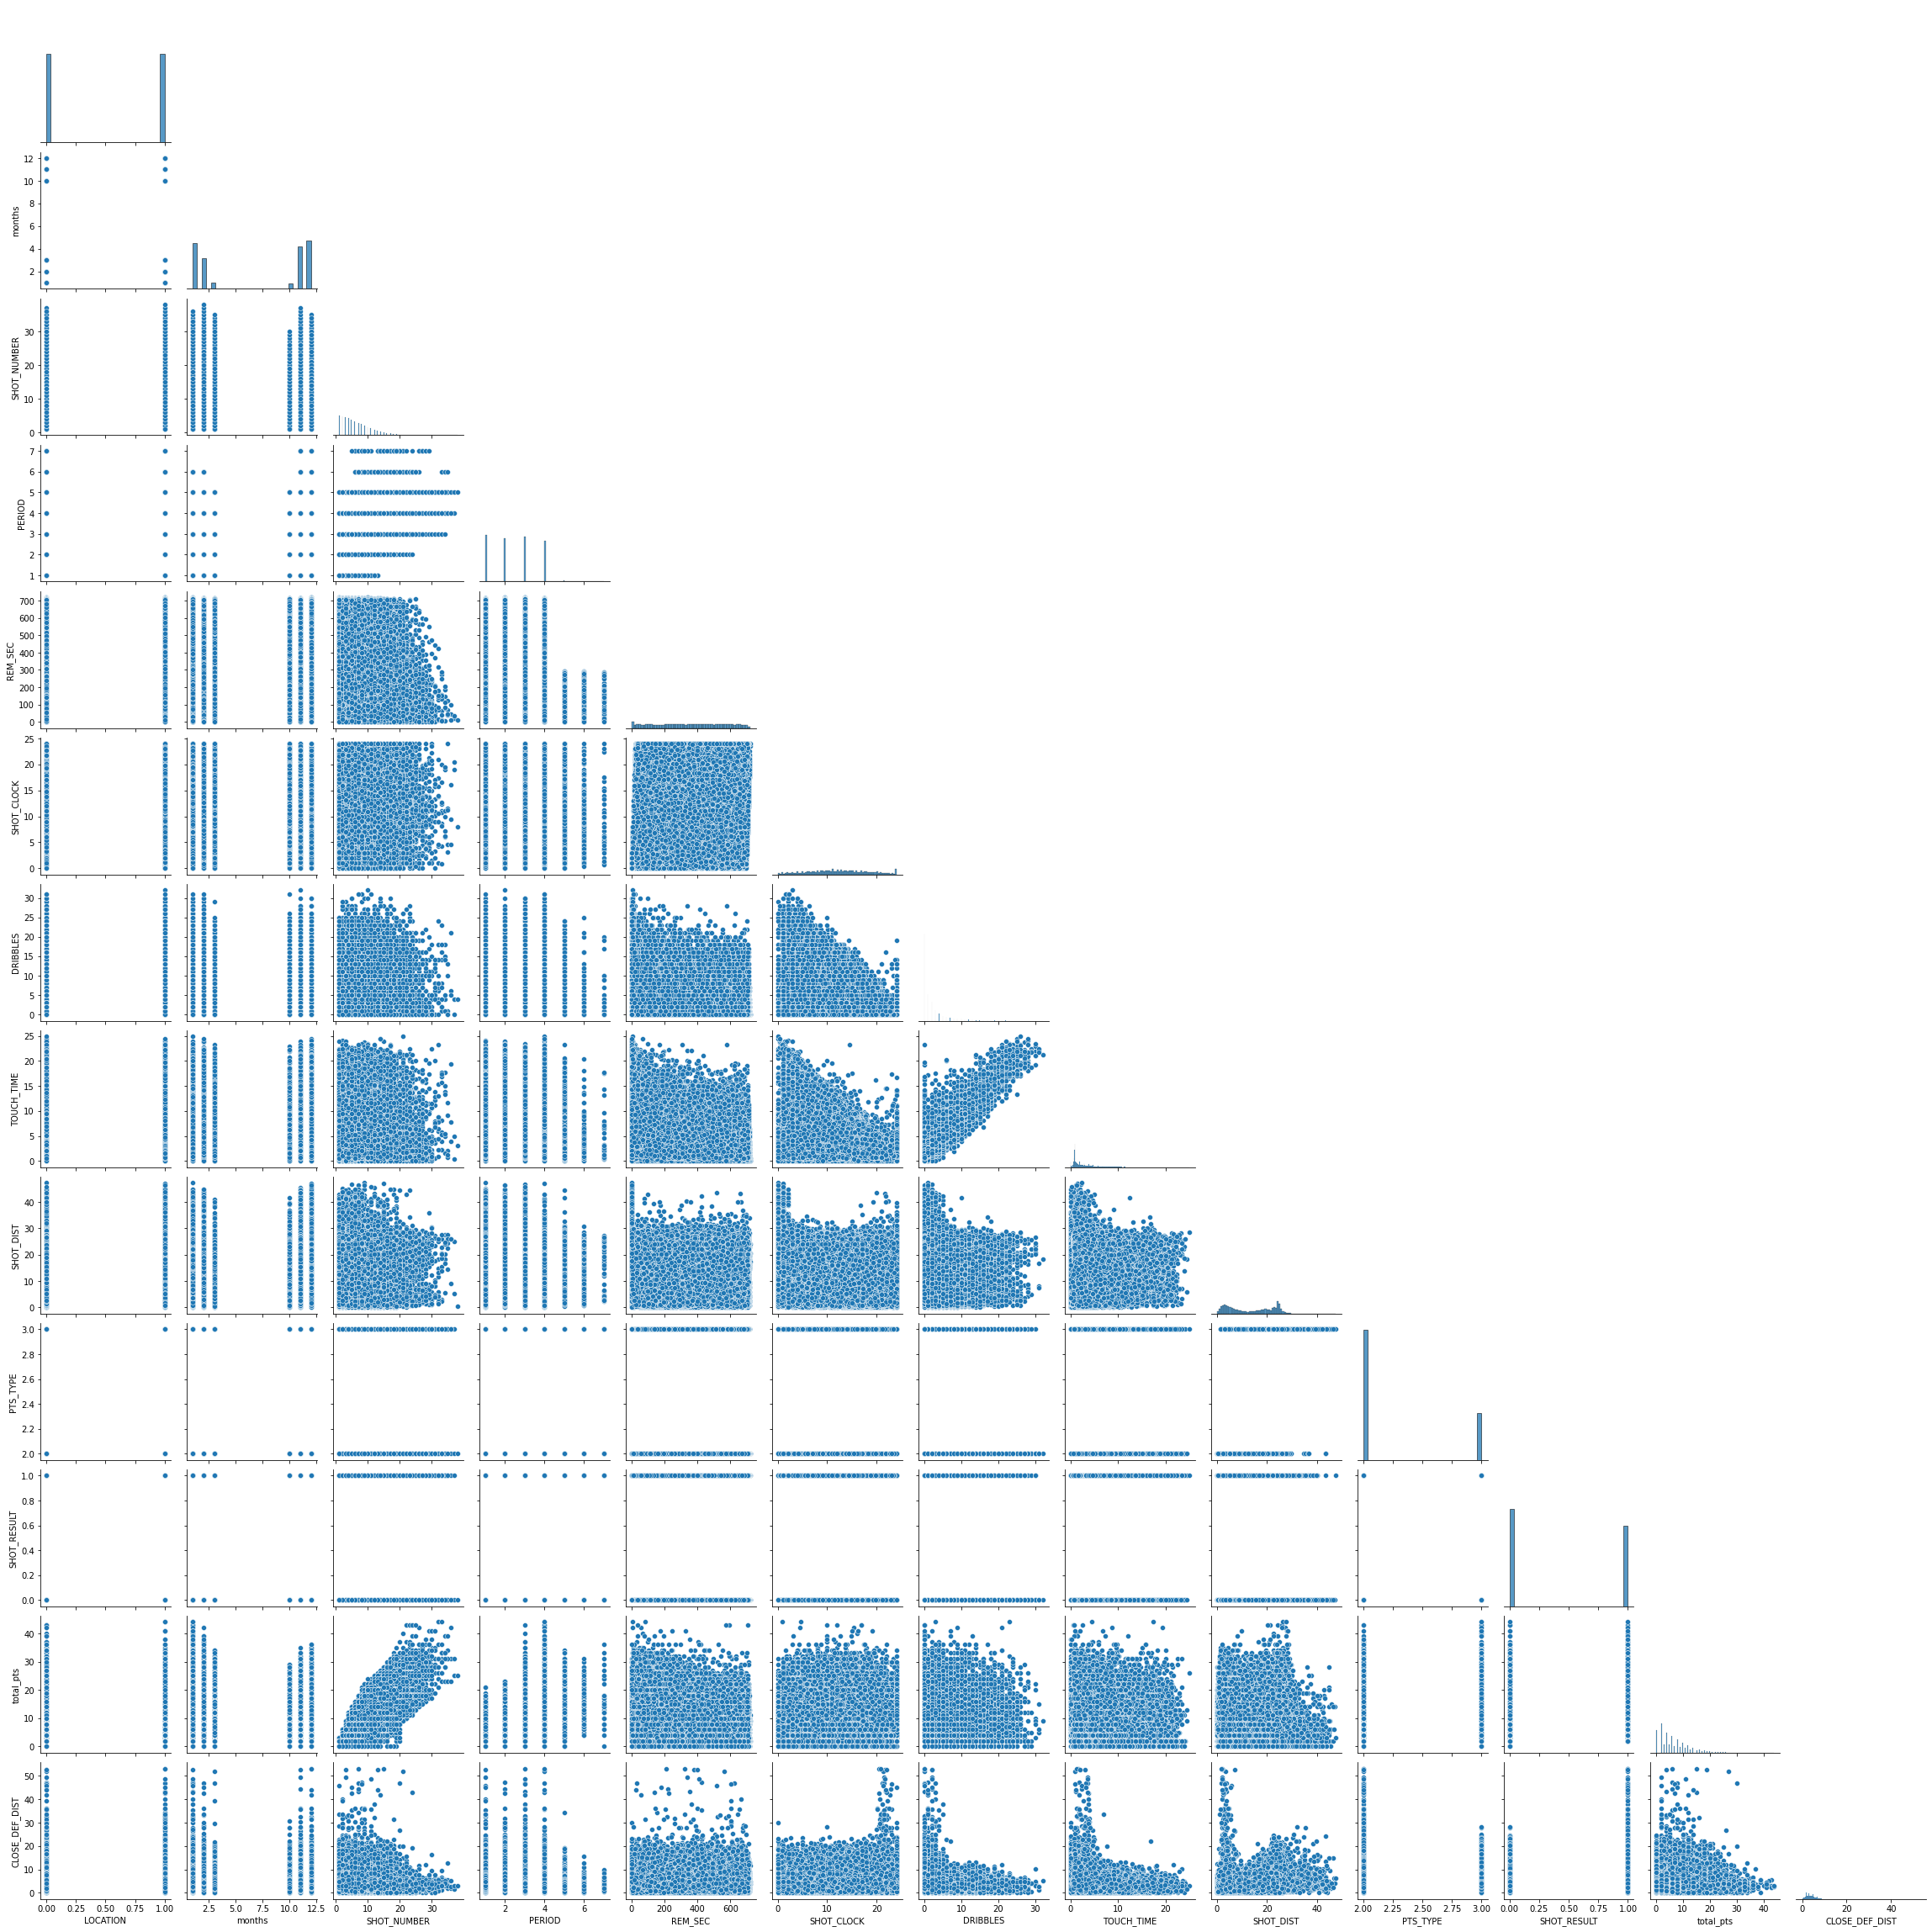

In [108]:
#Visualize Relationships
sns.pairplot(shots, corner=True)

<AxesSubplot:>

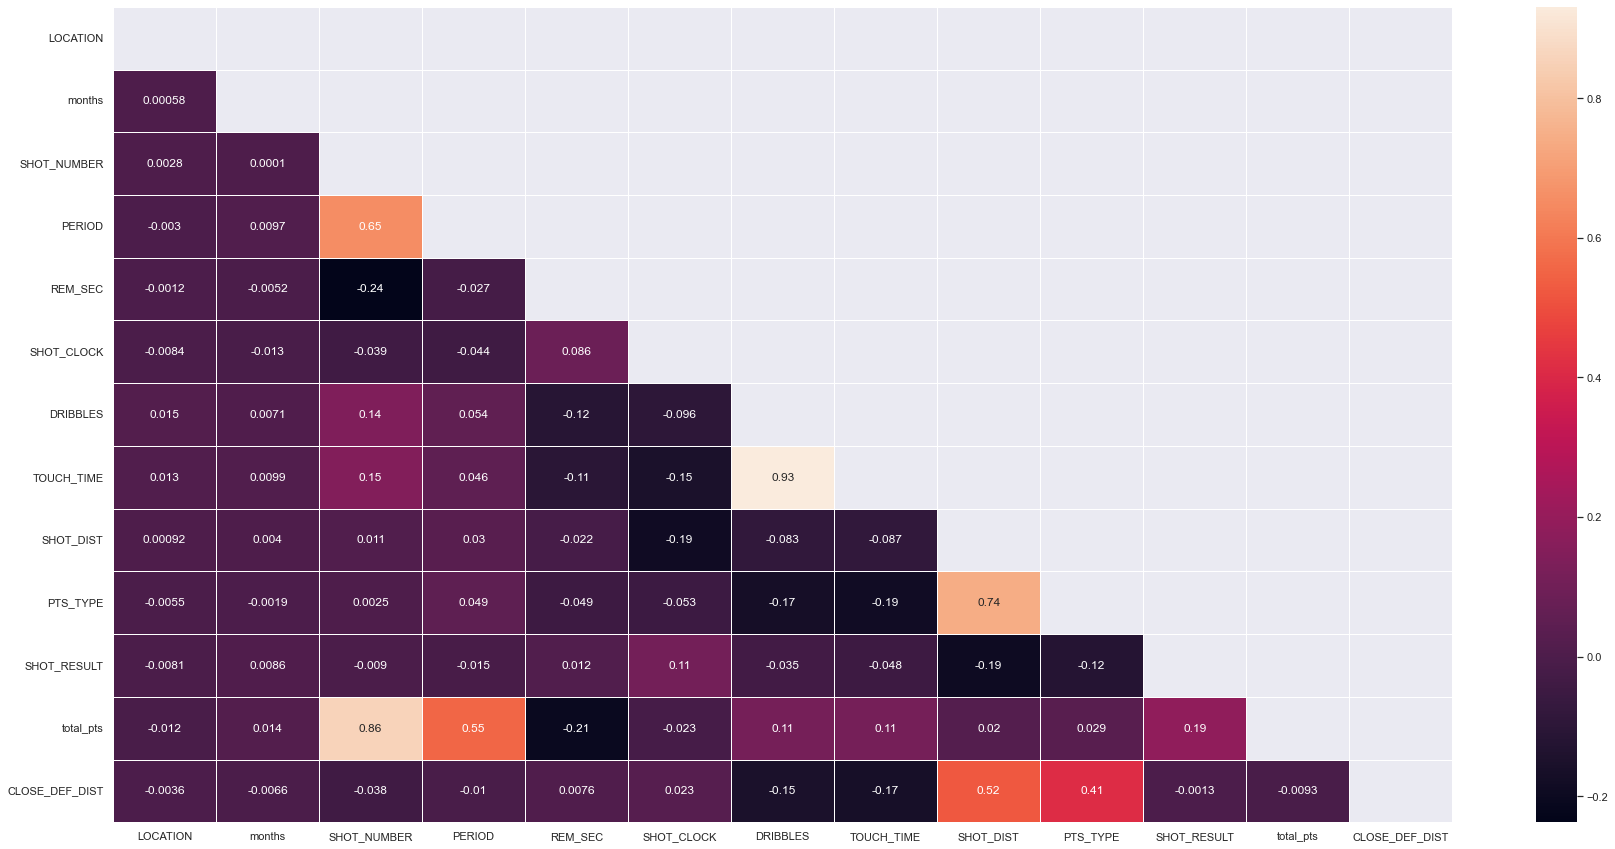

In [134]:
plt.figure(figsize=(30, 15))
correlationMatrix = shots.corr()
mask =np.zeros_like(correlationMatrix)
mask[np.triu_indices_from(mask)] = True
heatmap = sns.heatmap(correlationMatrix, annot =True, linewidth = .5, mask=mask)
heatmap

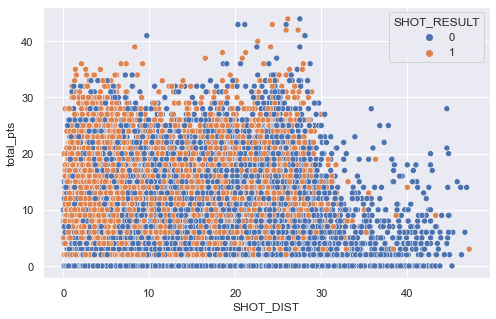

In [137]:
#Visualize additional relationships
sns.scatterplot(x='SHOT_DIST', y='total_pts', data=shots, hue='SHOT_RESULT')
sns.set(rc={"figure.figsize":(8,5)})


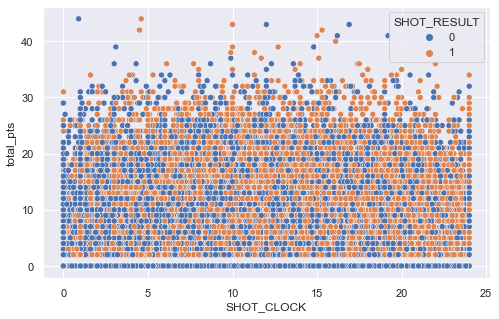

In [118]:
sns.scatterplot(x='SHOT_CLOCK', y='total_pts', data=shots, hue='SHOT_RESULT')
sns.set(rc={"figure.figsize":(8,5)})


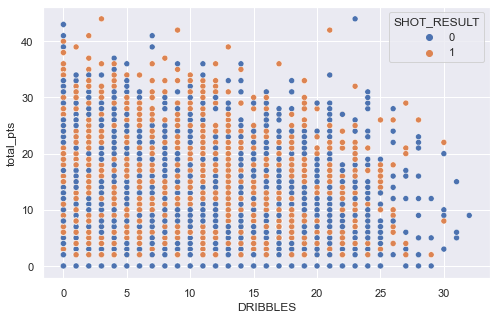

In [119]:
sns.scatterplot(x='DRIBBLES', y='total_pts', data=shots, hue='SHOT_RESULT')
sns.set(rc={"figure.figsize":(8,5)})

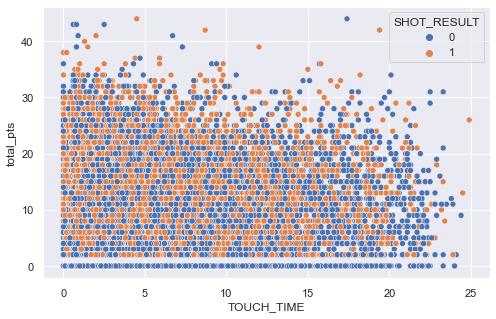

In [120]:
sns.scatterplot(x='TOUCH_TIME', y='total_pts', data=shots, hue='SHOT_RESULT')
sns.set(rc={"figure.figsize":(8,5)})

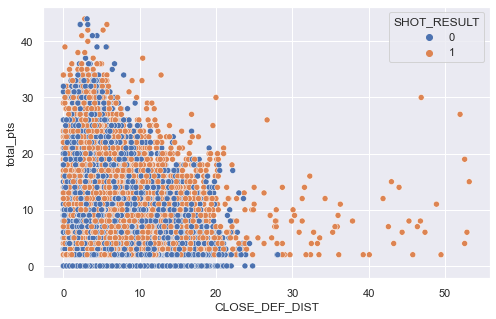

In [131]:
sns.scatterplot(x='CLOSE_DEF_DIST', y='total_pts', data=shots, hue='SHOT_RESULT')
sns.set(rc={"figure.figsize":(8,5)})

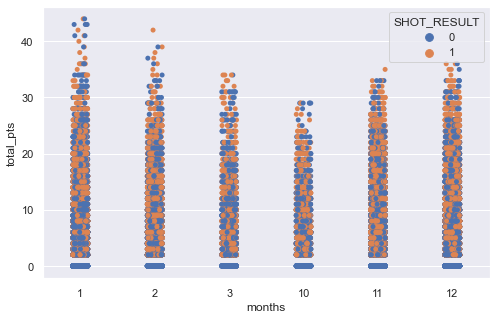

In [122]:
sns.stripplot(x='months', y='total_pts', data=shots, hue='SHOT_RESULT')
sns.set(rc={"figure.figsize":(8,5)})


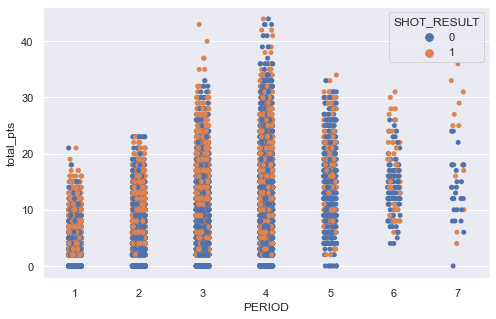

In [124]:
sns.stripplot(x='PERIOD', y='total_pts', data=shots, hue='SHOT_RESULT')
sns.set(rc={"figure.figsize":(8,5)})

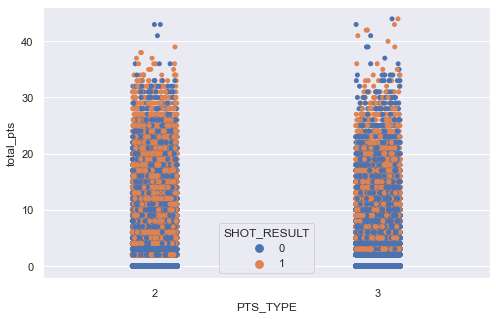

In [126]:
sns.stripplot(x='PTS_TYPE', y='total_pts', data=shots, hue='SHOT_RESULT')
sns.set(rc={"figure.figsize":(8,5)})

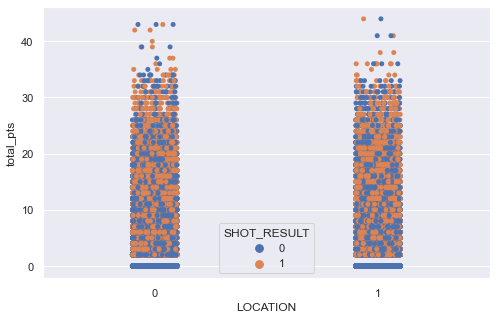

In [129]:
sns.stripplot(x='LOCATION', y='total_pts', data=shots, hue='SHOT_RESULT')
sns.set(rc={"figure.figsize":(8,5)})

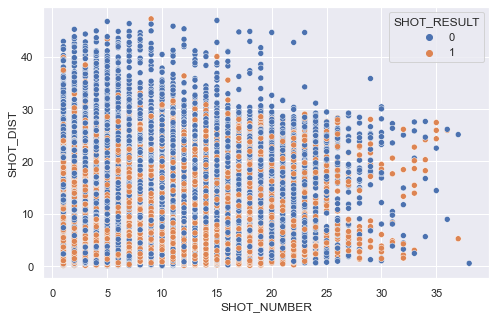

In [132]:
sns.scatterplot(x='SHOT_NUMBER', y='SHOT_DIST', data=shots, hue='SHOT_RESULT')
sns.set(rc={"figure.figsize":(8,5)})

## Using PCA

In [4]:
shots.columns

Index(['player_name', 'LOCATION', 'months', 'SHOT_NUMBER', 'PERIOD', 'REM_SEC',
       'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'PTS_TYPE',
       'SHOT_RESULT', 'total_pts', 'CLOSEST_DEFENDER', 'CLOSE_DEF_DIST'],
      dtype='object')

In [5]:
#Choose variables to use
X = shots[['SHOT_NUMBER', 'REM_SEC', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'PTS_TYPE',
           'total_pts', 'CLOSE_DEF_DIST']]

In [6]:
from sklearn.preprocessing import StandardScaler

#Standardize data
scaler = StandardScaler()
scaler.fit(X)
x_scaled = scaler.transform(X)

In [7]:
#Create PCA model
pca = PCA(n_components=2, random_state=7)
pca_mdl = pca.fit_transform(x_scaled)
pca_df = pd.DataFrame(pca_mdl)

In [8]:
pca_df

0         1
0       0.405631 -1.397421
1      -2.280326  1.183299
2       0.842089 -0.644707
3      -0.505538 -1.221951
4       0.585171 -1.885939
...          ...       ...
125746  1.723724 -0.755094
125747  1.565201 -1.753858
125748  0.114813 -0.538162
125749  1.000162  0.653550
125750  2.021618  0.378223

[125751 rows x 2 columns]

<AxesSubplot:xlabel='0', ylabel='1'>

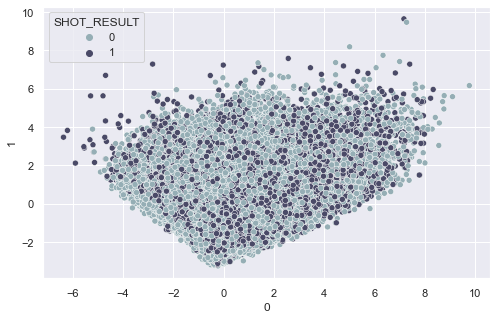

In [24]:
sns.set_theme(style="darkgrid")
sns.set(rc={"figure.figsize":(8,5)})
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=shots.SHOT_RESULT, palette="bone_r")

<AxesSubplot:xlabel='0', ylabel='1'>

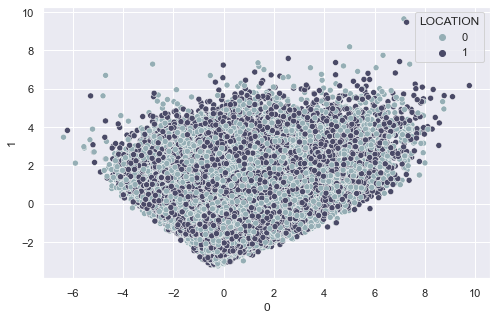

In [25]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=shots.LOCATION, palette="bone_r")

<AxesSubplot:xlabel='0', ylabel='1'>

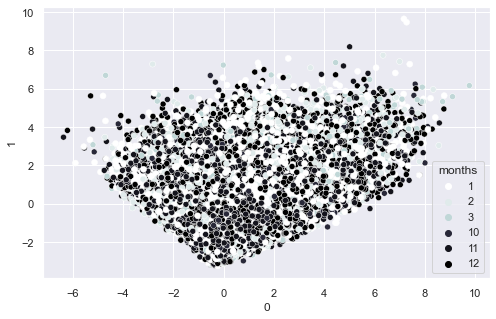

In [33]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=shots.months, palette="bone_r")

<AxesSubplot:xlabel='0', ylabel='1'>

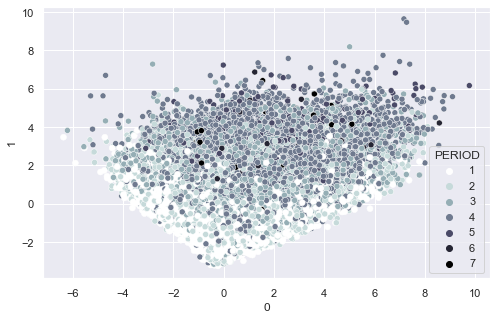

In [34]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=shots.PERIOD, palette="bone_r")

In [27]:
pca.explained_variance_ratio_

array([0.27245304, 0.23137199])

In [28]:
#Create PCA model with 3 dimensions
pca3 = PCA(n_components = 3, random_state = 7)
pca_md3 = pca3.fit_transform(x_scaled)
pca_df3 = pd.DataFrame(pca_md3)

In [29]:
pca3.explained_variance_ratio_

array([0.27245304, 0.23137199, 0.17556412])

In [30]:
pca_df3

0         1         2
0       0.405631 -1.397421  0.186328
1      -2.280326  1.183299  1.292166
2       0.842089 -0.644707  0.761575
3      -0.505538 -1.221951  0.608915
4       0.585171 -1.885939  0.031026
...          ...       ...       ...
125746  1.723724 -0.755094  0.472244
125747  1.565201 -1.753858 -0.183539
125748  0.114813 -0.538162 -0.265743
125749  1.000162  0.653550  0.341240
125750  2.021618  0.378223 -0.376136

[125751 rows x 3 columns]

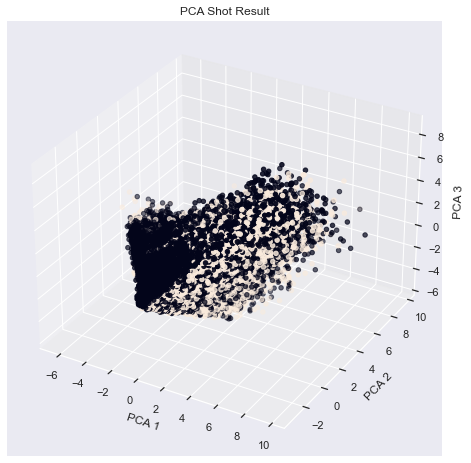

In [45]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection = '3d')

x = pca_df3[0]
y = pca_df3[1]
z = pca_df3[2]

ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")



ax.scatter(x, y, z, c = shots.SHOT_RESULT)
plt.title("PCA Shot Result")

plt.show()

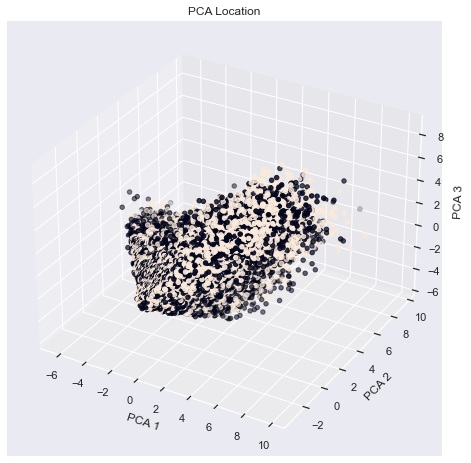

In [46]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection = '3d')

x = pca_df3[0]
y = pca_df3[1]
z = pca_df3[2]

ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")

ax.scatter(x, y, z, c = shots.LOCATION)
plt.title("PCA Location")


plt.show()

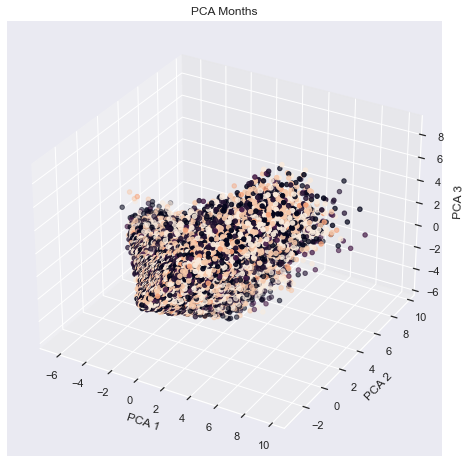

In [47]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection = '3d')

x = pca_df3[0]
y = pca_df3[1]
z = pca_df3[2]

ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")

ax.scatter(x, y, z, c = shots.months)
plt.title("PCA Months")


plt.show()

In [48]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection = '3d')

x = pca_df3[0]
y = pca_df3[1]
z = pca_df3[2]

ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")

ax.scatter(x, y, z, c = shots.PERIOD)
plt.title("PCA Quarter")


plt.show()

## K-Means Clustering 

K-Means clustering is the better clustering method for large datasets (lower time complexity) 

In [49]:
#Determining number of clusters 
inertia = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=7).fit(x_scaled)
    inertia.append(np.sqrt(kmeans.inertia_))

Text(0, 0.5, 'Variance')

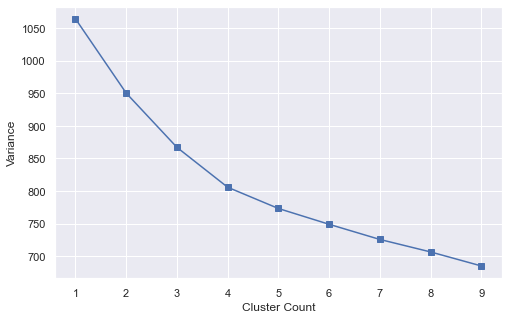

In [50]:
#minimize the variation, or within-cluster sum-of-squares   
plt.plot(range(1, 10), inertia, marker='s');
plt.xlabel('Cluster Count')
plt.ylabel('Variance')

In [228]:
#Another way to view it using k-means score
kmeans_list = [KMeans(n_clusters=n, max_iter=1000, algorithm='auto') for n in range(1,10)]
scores = [kmeans.fit(pca_df).score(pca_df) for kmeans in kmeans_list]

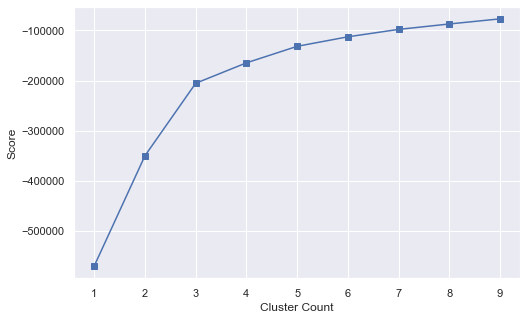

In [229]:
plt.plot(range(1,10), scores, marker='s')
plt.xlabel('Cluster Count')
plt.ylabel('Score')
plt.show()

In [51]:
#Using 3 clusters, create k-means model
#create KMeans model
kmeans1 = KMeans(n_clusters=3, random_state=7).fit(x_scaled)
y = kmeans1.fit_predict(x_scaled)

<AxesSubplot:xlabel='0', ylabel='1'>

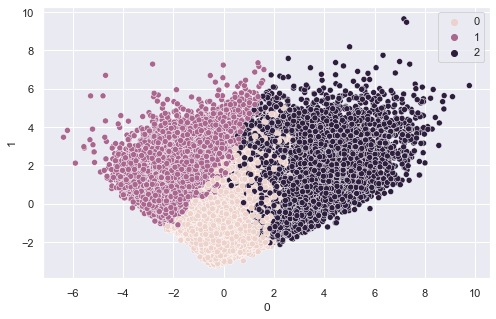

In [67]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=y)

In [65]:
#Using 4 clusters, create k-means model
#create KMeans model
kmeans2 = KMeans(n_clusters=4, random_state=7).fit(x_scaled)
y2 = kmeans2.fit_predict(x_scaled)

<AxesSubplot:xlabel='0', ylabel='1'>

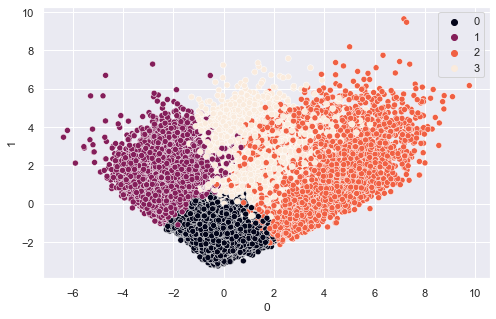

In [72]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=y2, palette="rocket")

In [73]:
#Model with 3 dimensions

#Determine number of clusters
kmeans_list = [KMeans(n_clusters=n, max_iter=1000, algorithm='auto') for n in range(1,10)]
scores = [kmeans.fit(pca_df3).score(pca_df3) for kmeans in kmeans_list]

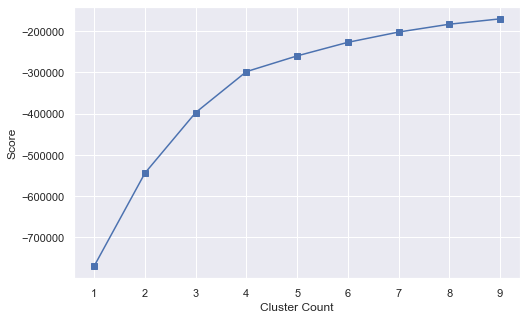

In [251]:
plt.plot(range(1,10), scores, marker='s')
plt.xlabel('Cluster Count')
plt.ylabel('Score')
plt.show()

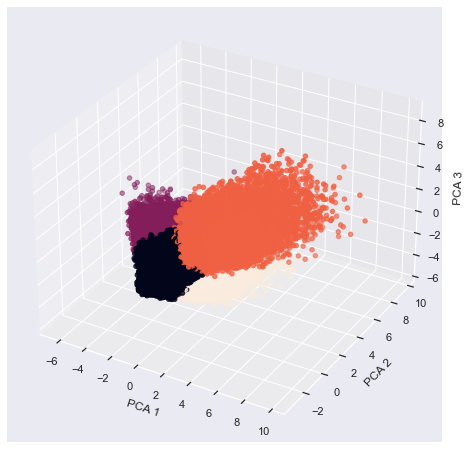

In [82]:
#Using 4 clusters again, visualize for 3 dimensions
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection = '3d')

x = pca_df3[0]
y = pca_df3[1]
z = pca_df3[2]

ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")

ax.scatter(x, y, z, c = y2)

plt.show()

In [77]:
#4 clusters seems to be sufficient 
#Add clusters to original data
y_df = pd.DataFrame(y2, columns=['Cluster'])
shots_clusters = pd.concat([shots, y_df], axis=1)

In [83]:
shots_clusters

player_name  LOCATION  months  SHOT_NUMBER  PERIOD  REM_SEC  \
0       brian roberts         1       3            1       1       69   
1       brian roberts         1       3            2       1       14   
2       brian roberts         1       3            3       1        0   
3       brian roberts         1       3            4       2      707   
4       brian roberts         1       3            5       2      634   
...               ...       ...     ...          ...     ...      ...   
125746   jarrett jack         1      10            5       3      112   
125747   jarrett jack         1      10            6       4      688   
125748   jarrett jack         1      10            7       4      670   
125749   jarrett jack         1      10            8       4      157   
125750   jarrett jack         1      10            9       4       12   

        SHOT_CLOCK  DRIBBLES  TOUCH_TIME  SHOT_DIST  PTS_TYPE  SHOT_RESULT  \
0             10.8         2         1.9        7.7         2            1   
1              3.4         0         0.8       28.2         3            0   
2              0.0         3         2.7       10.1         2            0   
3             10.3         2         1.9       17.2         2            0   
4             10.9         2         2.7        3.7         2            0   
...            ...       ...         ...        ...       ...          ...   
125746        18.3         5         6.2        8.7         2            0   
125747        19.8         4         5.2        0.6         2            1   
125748        23.0         2         4.2       16.9         2            1   
125749         9.1         4         4.5       18.3         2            0   
125750        12.0         5         4.7        5.1         2            1   

        total_pts   CLOSEST_DEFENDER  CLOSE_DEF_DIST  Cluster  
0               2     Anderson, Alan             1.3        0  
1               2  Bogdanovic, Bojan             6.1        1  
2               2  Bogdanovic, Bojan             0.9        0  
3               2      Brown, Markel             3.4        0  
4               2    Young, Thaddeus             1.1        0  
...           ...                ...             ...      ...  
125746          4      Smart, Marcus             0.8        0  
125747          6       Turner, Evan             0.6        0  
125748          8   Thornton, Marcus             4.2        0  
125749          8     Bradley, Avery             3.0        3  
125750         10     Bradley, Avery             2.3        3  

[125751 rows x 16 columns]

In [79]:
shots_clusters['Cluster'].value_counts()

0    59867
1    31305
3    23813
2    10766
Name: Cluster, dtype: int64

In [80]:
import plotly.express as px

In [ ]:
#interactive 2d plot
fig = px.scatter(pd.concat([shots_clusters, pca_df], axis = 1), 
                 x = 0, y = 1, color='Cluster', hover_data=['player_name','LOCATION','months','PERIOD', 'SHOT_RESULT'])
fig.show()

In [ ]:
#interactive 3d plot
fig = px.scatter_3d(pd.concat([shots_clusters, pca_df3], axis = 1), 
                 x = 0, y = 1, z = 2, color='Cluster', hover_data=['player_name','LOCATION','months',
                                                                   'PERIOD', 'SHOT_RESULT'])
fig.show()

In [263]:
#Save data as csv
shots_clusters.to_csv(r'C:\Users\andre\Downloads\NBA Shots 2014-2105\shots_clusters.csv', index = False)

## Cluster Analysis

In [119]:
#Re-import data
shots_clusters = pd.read_csv (r'C:\Users\andre\Downloads\NBA Shots 2014-2105\shots_clusters.csv')

In [120]:
shots_clusters.columns

Index(['player_name', 'LOCATION', 'months', 'SHOT_NUMBER', 'PERIOD', 'REM_SEC',
       'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'PTS_TYPE',
       'SHOT_RESULT', 'total_pts', 'CLOSEST_DEFENDER', 'CLOSE_DEF_DIST',
       'Cluster'],
      dtype='object')

In [122]:
shots_clusters[['Cluster', 'LOCATION']].value_counts()

Cluster  LOCATION
0        1           30091
         0           29776
1        0           15832
         1           15473
3        0           11993
         1           11820
2        1            5604
         0            5162
dtype: int64

In [123]:
#Generate counts, then make dataframe
months_df = shots_clusters[['Cluster', 'months']].value_counts()

In [124]:
months_df = pd.DataFrame(months_df)
months_df = months_df.reset_index()
months_df.columns = ['Clusters', 'Months', 'counts']

In [125]:
months_df = months_df.groupby(['Clusters', 'Months']).sum().reset_index()

In [126]:
months_df

Clusters  Months  counts
0          0       1   15524
1          0       2   10290
2          0       3    2035
3          0      10    1657
4          0      11   14388
5          0      12   15973
6          1       1    8004
7          1       2    5459
8          1       3    1065
9          1      10     883
10         1      11    7471
11         1      12    8423
12         2       1    2666
13         2       2    1822
14         2       3     405
15         2      10     285
16         2      11    2563
17         2      12    3025
18         3       1    6049
19         3       2    3868
20         3       3     840
21         3      10     696
22         3      11    5652
23         3      12    6708

<AxesSubplot:xlabel='Clusters', ylabel='counts'>

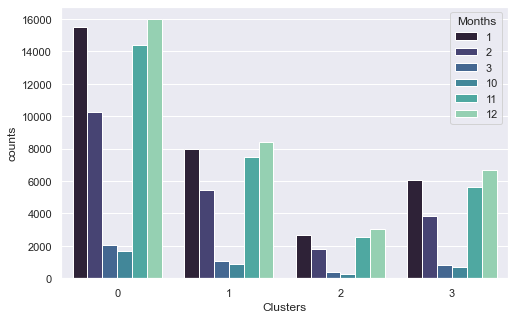

In [127]:
sns.barplot(x="Clusters", y="counts", hue="Months", data=months_df, palette = "mako")

In [128]:
#Generate counts, then make dataframe
period_df = shots_clusters[['Cluster', 'PERIOD']].value_counts()

In [129]:
period_df = pd.DataFrame(period_df)
period_df = period_df.reset_index()
period_df.columns = ['Clusters', 'Period', 'counts']

In [130]:
period_df = period_df.groupby(['Clusters', 'Period']).sum().reset_index()

In [131]:
period_df

Clusters  Period  counts
0          0       1   22562
1          0       2   17500
2          0       3   12023
3          0       4    7709
4          0       5      65
5          0       6       5
6          0       7       3
7          1       1    8034
8          1       2    8064
9          1       3    7929
10         1       4    7094
11         1       5     150
12         1       6      25
13         1       7       9
14         2       1    2208
15         2       2    2726
16         2       3    2825
17         2       4    2865
18         2       5     123
19         2       6      15
20         2       7       4
21         3       1     323
22         3       2    2657
23         3       3    9032
24         3       4   11094
25         3       5     558
26         3       6     122
27         3       7      27

<AxesSubplot:xlabel='Clusters', ylabel='counts'>

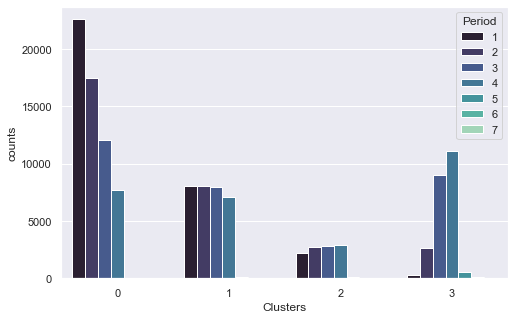

In [132]:
sns.barplot(x="Clusters", y="counts", hue="Period", data=period_df, palette = "mako")

In [133]:
#Generate counts, then make dataframe
result_df = shots_clusters[['Cluster', 'SHOT_RESULT']].value_counts()

In [134]:
result_df = pd.DataFrame(result_df)
result_df = result_df.reset_index()
result_df.columns = ['Clusters', 'Result', 'counts']

In [135]:
result_df = result_df.groupby(['Clusters', 'Result']).sum().reset_index()

In [136]:
result_df

Clusters  Result  counts
0         0       0   30982
1         0       1   28885
2         1       0   20106
3         1       1   11199
4         2       0    6280
5         2       1    4486
6         3       0   11465
7         3       1   12348

<AxesSubplot:xlabel='Clusters', ylabel='counts'>

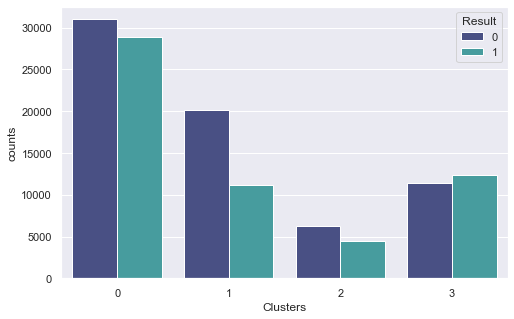

In [137]:
sns.barplot(x="Clusters", y="counts", hue="Result", data=result_df, palette = "mako")

In [95]:
shots_clusters = shots_clusters[['SHOT_NUMBER', 'REM_SEC',
       'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'PTS_TYPE',
       'total_pts', 'CLOSEST_DEFENDER', 'CLOSE_DEF_DIST',
       'Cluster']]

In [96]:
#Group by continuous varibles, get means for each
shots_clusters = shots_clusters.groupby('Cluster').mean().reset_index()

In [97]:
shots_clusters

Cluster  SHOT_NUMBER     REM_SEC  SHOT_CLOCK   DRIBBLES  TOUCH_TIME  \
0        0     4.159303  396.109877   12.734273   1.330232    2.247848   
1        1     5.724102  347.306117   11.836566   0.504616    1.395838   
2        2     7.989225  278.813115   11.201254  11.230819   10.237303   
3        3    12.896653  275.222693   11.887204   1.655734    2.581695   

   SHOT_DIST  PTS_TYPE  total_pts  CLOSE_DEF_DIST  
0   9.111666  2.000050   3.808091        3.280465  
1  24.281019  2.958154   5.857563        6.454946  
2  12.798792  2.127531   7.888166        3.434237  
3  11.074543  2.082098  13.909125        3.492177

In [100]:
shots_clusters.columns

Index(['Cluster', 'SHOT_NUMBER', 'REM_SEC', 'SHOT_CLOCK', 'DRIBBLES',
       'TOUCH_TIME', 'SHOT_DIST', 'PTS_TYPE', 'total_pts', 'CLOSE_DEF_DIST'],
      dtype='object')

<AxesSubplot:xlabel='Cluster', ylabel='CLOSE_DEF_DIST'>

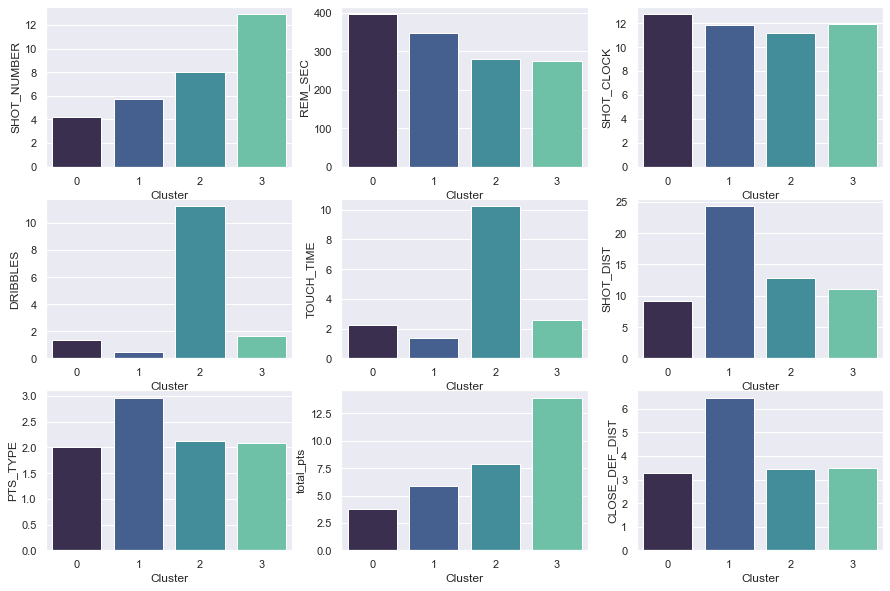

In [117]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

#create boxplot in each subplot
sns.barplot(x=shots_clusters["Cluster"], y=shots_clusters["SHOT_NUMBER"], palette = "mako", ax=axes[0, 0])
sns.barplot(x=shots_clusters["Cluster"], y=shots_clusters["REM_SEC"], palette = "mako", ax=axes[0, 1])
sns.barplot(x=shots_clusters["Cluster"], y=shots_clusters["SHOT_CLOCK"], palette = "mako", ax=axes[0, 2])
sns.barplot(x=shots_clusters["Cluster"], y=shots_clusters["DRIBBLES"], palette = "mako", ax=axes[1, 0])
sns.barplot(x=shots_clusters["Cluster"], y=shots_clusters["TOUCH_TIME"], palette = "mako", ax=axes[1, 1])
sns.barplot(x=shots_clusters["Cluster"], y=shots_clusters["SHOT_DIST"], palette = "mako", ax=axes[1, 2])
sns.barplot(x=shots_clusters["Cluster"], y=shots_clusters["PTS_TYPE"], palette = "mako", ax=axes[2, 0])
sns.barplot(x=shots_clusters["Cluster"], y=shots_clusters["total_pts"], palette = "mako", ax=axes[2, 1])
sns.barplot(x=shots_clusters["Cluster"], y=shots_clusters["CLOSE_DEF_DIST"], palette = "mako", ax=axes[2, 2])